- 20144753 Seung Yeop, Seon
- https://github.com/SYseon/Assignment10
- Use least square, we can get a boundary which helps to decide where the sample belongs
- Put the values from the product of feature and parameter into the sign function.

\begin{equation} Using\ random\ variables, make\ feature\ fucntions\ f(x)\ then, \end{equation}
\begin{equation}A=\begin{Bmatrix} 
     f(x_{1})_{1} & f(x_{1})_{2} & \dots & f(x_{1})_{p}\\
    f(x_{2})_{1} & f(x_{2})_{2} & \dots & f(x_{2})_{p}\\
    \vdots & \vdots & \vdots & \vdots \\
    f(x_{m})_{1} & f(x_{m})_{2} & \dots & f(x_{m})_{p}\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}b=\begin{Bmatrix} 
      y_1\\
    y_2\\
    \vdots\\
    y_p\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}\theta=(A^TA)^{-1}A^Tb\end{equation}

\begin{equation} if,\;x<0\; then,\;sign(x)= -1.\quad otherwise,\; sign(x)= 1 \end{equation}

\begin{equation} Repeat\ above\ procedure, until\ numbers\ 0\ to\ 9\ will\ be\ classified.\end{equation}

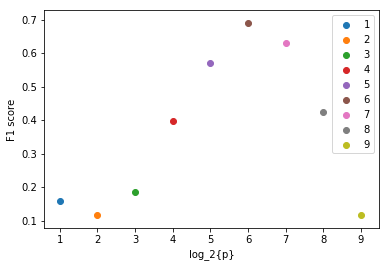

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
class classifier():
    def __init__(self, p = 1, n_class = 2):
        self.p = p
        self.n_class = n_class
        
    def fit(self, X, y):
        self.w_list = []
        X = np.where(np.isnan(X), 0, X)
        self.X = self.min_max(X)
        self.y = y
        self.r = np.random.normal(0, 1, (self.p,self.X.shape[1]))
        self.tr_A = self.feature_change(self.X)
        for i in range(self.n_class - 1):
            self.temp_y = np.where(self.y == i, 1, -1)
            self.w = np.dot(np.dot(lin.inv(np.dot(self.tr_A.T, self.tr_A)), self.tr_A.T), self.temp_y)
            self.w_list.append(self.w)
            positive_index = np.where(self.sign(np.dot(self.tr_A,self.w)) == 1)[0]
            self.tr_A = np.delete(self.tr_A, positive_index, axis = 0)
            self.y = np.delete(self.y, positive_index)
            
    def feature_change(self, X):
        A = np.zeros((X.shape[0], self.p))
        for j in range(X.shape[0]):
            for i in range(self.p):
                A[j][i] = np.dot(X[j], self.r[i].T)
        return A
    
    def min_max(self, data):
        result = (data-data.min()) / (data.max() - data.min())
        return result
 
    def sign(self, data, label = 1):
        return np.where(data>=0, 1, -1)
 
    def predict(self, ts_x):
        self.ts_A = self.feature_change(self.min_max(ts_x))
        y = np.ones(ts_x.shape[0])
        finished_index = np.empty(0)
        for i in range(self.n_class - 1):
            self.sign(np.dot(self.ts_A, self.w_list[i]))
            temp_index = np.where(self.sign(np.dot(self.ts_A, self.w_list[i])) == 1)[0]
            for j in temp_index:
                if not j in finished_index:
                    y[j] = i
            if i == self.n_class-2:
                negative_index = np.where(self.sign(np.dot(self.ts_A, self.w_list[i])) == -1)[0]
                for j in negative_index:
                    if not j in finished_index:
                        y[j] = self.n_class - 1
            finished_index = np.concatenate((finished_index, temp_index))
            
        return y.astype(int)
 
    
tr = pd.read_csv("mnist_train.csv")
ts = pd.read_csv("mnist_test.csv")
tr_data = np.array(tr)
ts_data = np.array(ts) 
tr_y, tr_x = np.split(tr_data, [1], axis=1)
ts_y, ts_x = np.split(ts_data, [1], axis=1)
x=np.arange(1,10)
max_f1_score = 0
max_p = 0
result_y_pred = np.zeros(ts_y.shape)
for i in x:
    clf = classifier(2**i, 10)
    clf.fit(tr_x, tr_y)
    y_pred = clf.predict(ts_x)
    y=f1_score(ts_y, y_pred, average='macro', labels=np.unique(y_pred))
    if y>max_f1_score:
        max_f1_score = y
        max_p = i
        result_y_pred = y_pred
    plt.scatter(i, y, label=i)
    
plt.ylabel("F1 score")
plt.xlabel("log_2{p}")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- This is F1 score, about 2^p

In [12]:
print("Maximum F1 score :",max_f1_score, "When p = ", 2**max_p)

Maximum F1 score : 0.6907817047276686 When p =  64


In [13]:
print(confusion_matrix(ts_y, result_y_pred))

[[800   0  10   5   6  29  17  13   7  93]
 [  0 999   1   3   1   1   2   2  36  90]
 [ 13  74 644  52  26   8  35  27  59  94]
 [  7  20  31 607   5  45   3  28  42 222]
 [  0   5  31  10 582   8  25  16  24 281]
 [ 35  11   8  71  19 522   9  31  87  99]
 [ 25   8 105   0  26  24 663   8  30  69]
 [  4  35  23  13  20   9   5 778  27 113]
 [  4  12   3  10  11  80  15  36 539 264]
 [  1   5  17   6  51  13  10 133  93 680]]


- This is a confusion matrix.